In [693]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm 
import time
from scipy.stats import norm
plt.rcParams['font.family'] = 'serif' #Change font to Times New Roman
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
from sklearn.linear_model import LinearRegression

# 1-D Random Walk

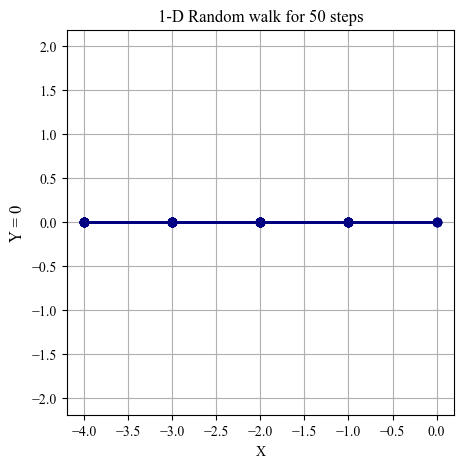

In [719]:
def generate_1Drw(N):
    x, y = np.array([0]), np.array([0])
    directions = np.array([(1, 0), (-1, 0)])  # Possible directions for the 1D
    for _ in range(N):
        dx,dy = directions[np.random.randint(0, 2)]  # Direction chosen at random from the 2 possibilities 
        x = np.concatenate((x, [x[-1] + dx]))
        y = np.concatenate((y, [y[-1] + dy]))
    return x,y

def plot_1Drw(N):  
    x,y = generate_1Drw(N)
    plt.figure(figsize=(5, 5))
    plt.plot(x,y, 'navy', marker='o', linewidth=1)
    plt.xlabel('X')
    plt.ylabel('Y = 0', fontsize = 12)
    plt.axis('equal')
    plt.grid()
    plt.title(f'1-D Random walk for 50 steps', fontsize = 12)  
    plt.show()        
plot_1Drw(50)


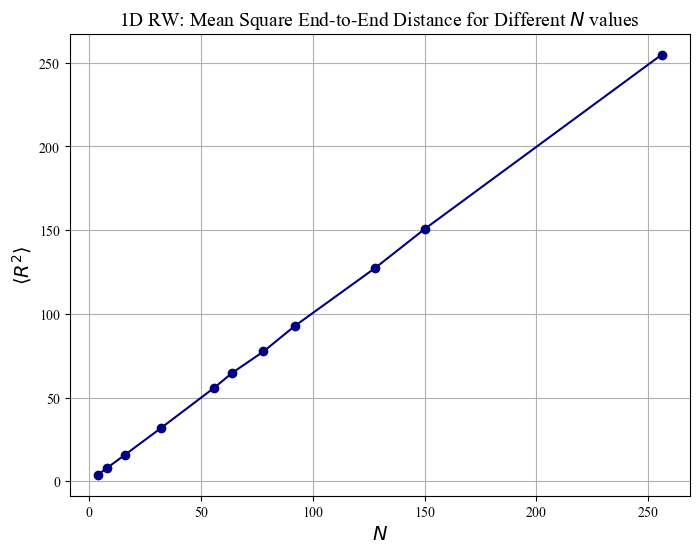

In [720]:
N_list = np.array([4, 8, 16, 32, 56, 64, 78, 92, 128, 150, 256])

#Mean-square end to end distance
def Mrsq(N, num_samples=1000):
    squared_distances = np.array([]) #empty array to store R^2 
    for _ in range(num_samples):
        x, y = generate_1Drw(N) #store x and y positions 
        squared_distance = (x[-1] - x[0])**2 + (y[-1] - y[0])**2
        squared_distances = np.concatenate((squared_distances, np.array([squared_distance])))
    mean_square_distance = np.mean(squared_distances) 
    return mean_square_distance

mean_square_distances = np.array([]) #empty array

for N in N_list:
    mean_square_distance = Mrsq(N, num_samples=10000)
    mean_square_distances = np.concatenate((mean_square_distances, np.array([mean_square_distance])))
    
plt.figure(figsize=(8, 6))
plt.plot(N_list, mean_square_distances, marker='o', color='navy')
plt.xlabel('$N$', fontsize = 14)
plt.ylabel(r'$\langle R^2 \rangle$', fontsize = 14)
plt.title('1D RW: Mean Square End-to-End Distance for Different $N$ values', fontsize=14)
plt.grid()
plt.show()

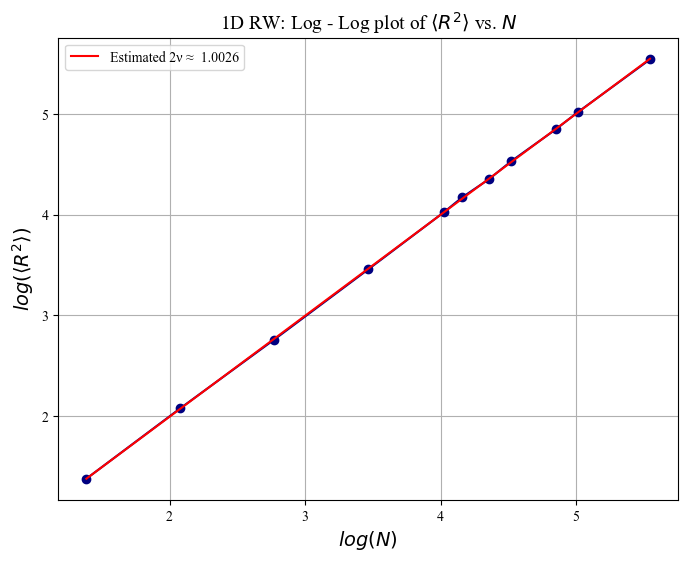

In [721]:
#log-log plot of R^2 vs N 

log_Nrw = np.log(N_list)
log_Rrw = np.log(mean_square_distances)

m, c = np.polyfit(log_Nrw, log_Rrw, 1)
log_Rrw_2 = m * log_Nrw + c  # Generate the best fit line with the same length as log_Nrw

plt.figure(figsize=(8, 6))
plt.plot(log_Nrw, log_Rrw, marker='o', color='navy')
plt.plot(log_Nrw, log_Rrw_2, color='red', label=f'Estimated 2ν ≈  {m:.4f}')
plt.xlabel('$log(N)$', fontsize = 14)
plt.ylabel(r'$log(\langle R^2 \rangle)$', fontsize = 14)
plt.title(r'1D RW: Log - Log plot of $\langle R^2 \rangle$ vs. $N$', fontsize = 14)
plt.legend()
plt.grid()
plt.show()

## 1-D Self-avoiding Walk 

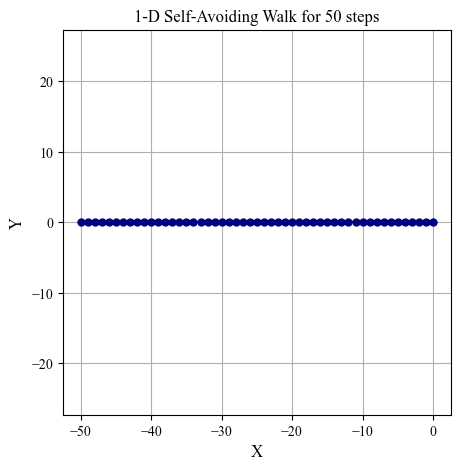

In [722]:
def self_avoiding_walk(desired_step_length=50): # N value
    # Initialize the starting point
    x, y = 0, 0

    # Create the grid dictionary to store visited positions
    grid = {(x, y): True}

    path = [(x, y)]
    current_step = 0

    while current_step < desired_step_length:
        options = []
        for dx, dy in [(1, 0), (-1, 0)]: #two possible directions 
            newX, newY = x + dx, y + dy
            if (newX, newY) not in grid:
                options.append((dx, dy))
        if options:
            step = random.choice(options)
            x += step[0]
            y += step[1]
            grid[(x, y)] = True
            path.append((x, y))
            current_step += 1
        else:
            # Return the path and False indicating the walker is stuck
            return path, False

    # Return the path and True indicating the walker is not stuck
    return path, True

path, completed = self_avoiding_walk()
plt.figure(figsize=(5,5))
plt.plot([x for x, _ in path], [y for _, y in path], marker='o', color='navy', markersize=5)
plt.xlabel("X", fontsize = 12)
plt.ylabel("Y", fontsize = 12)
plt.title("1-D Self-Avoiding Walk for 50 steps", fontsize = 12)
plt.axis('equal')
plt.grid()
plt.show()

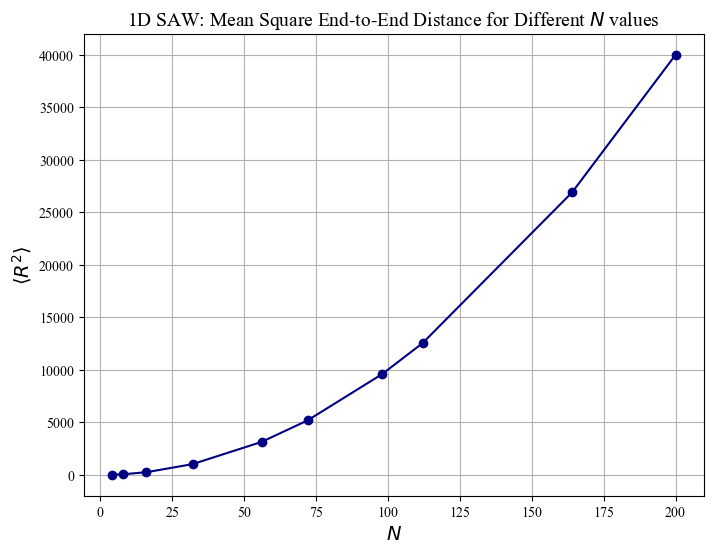

In [723]:
def mean_square_end_to_end_distance(N, num_samples=10000):
    squared_distances = np.zeros(num_samples)

    for i in range(num_samples):
        path, _ = self_avoiding_walk(desired_step_length=N)

        x, y = path[-1]  #final position
        squared_distance = x**2 + y**2  # Calculate squared distance
        squared_distances[i] = squared_distance

    #filter out 0s which may represent incomplete walks 
    completed_distances = squared_distances[squared_distances > 0]

    #estimate mean square distance
    if completed_distances.size > 0:
        mean_square_distance = np.mean(completed_distances)
    else:
        mean_square_distance = 0  #for no completed walks

    return mean_square_distance


N_list = np.array([4, 8, 16, 32, 56, 72, 98, 112, 164, 200])
mean_square_distances = np.array([])

for N in N_list:
    mean_square_distance = mean_square_end_to_end_distance(N, num_samples=10000)
    mean_square_distances = np.concatenate((mean_square_distances, np.array([mean_square_distance])))

#plotting the final result 
plt.figure(figsize=(8, 6))
plt.plot(N_list, mean_square_distances, marker='o', color='navy')
plt.xlabel('$N$', fontsize = 14)
plt.ylabel(r'$\langle R^2 \rangle$',fontsize = 14)
plt.title('1D SAW: Mean Square End-to-End Distance for Different $N$ values', fontsize=14)
plt.grid()
plt.show()


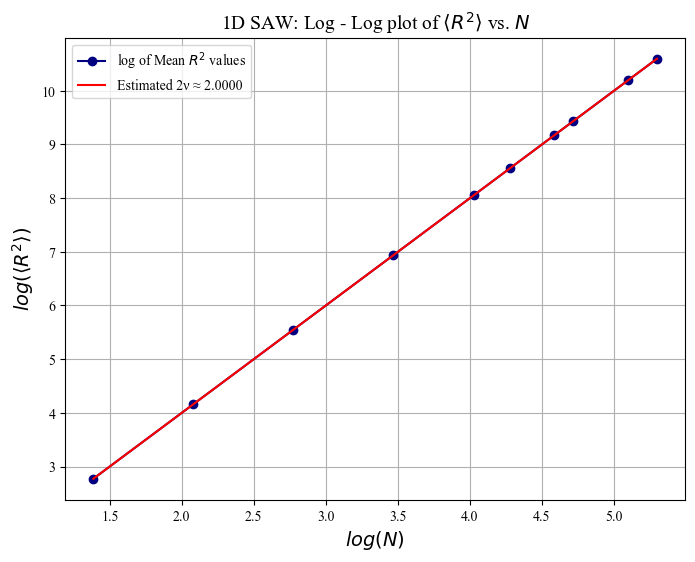

In [724]:
#log-log plot of R^2 vs N 

log_N = np.log(N_list)
log_R2 = np.log(mean_square_distances)
m,c = np.polyfit(log_N , log_R2, 1) #fitting the best fit line
log_R2_2 = [m*i + c for i in log_N]

plt.figure(figsize=(8, 6))
plt.plot(log_N , log_R2, marker='o', color='navy', label=r'log of Mean $R^2$ values')
plt.plot(log_N , log_R2_2, color='red', label = f'Estimated 2ν ≈ {m:.4f}')
plt.xlabel('$log(N)$', fontsize=14)
plt.ylabel(r'$log(\langle R^2 \rangle)$', fontsize=14)
plt.title(r'1D SAW: Log - Log plot of $\langle R^2 \rangle$ vs. $N$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# 2-D: Random Walk

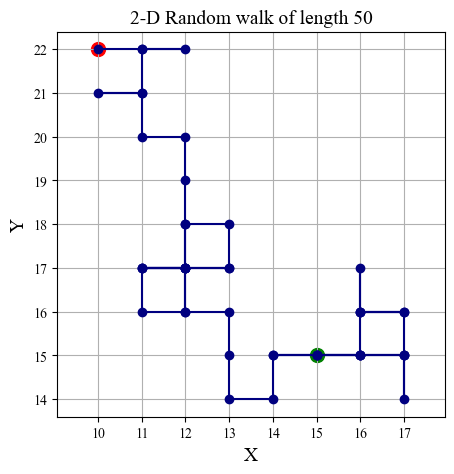

In [497]:
#function for generating the walk 
def generate_rw(N, cols=30, rows=30):
    middle = (cols // 2, rows // 2)  #Finding the middle of the grid

    x, y = np.array([middle[0]]), np.array([middle[1]])
    directions = np.array([(1, 0), (0, 1), (-1, 0), (0, -1)])  #Possible directions for the 2D lattice

    for _ in range(N):
        dx, dy = directions[np.random.randint(0, 4)]  #Direction chosen at random
        x = np.concatenate((x, [x[-1] + dx]))
        y = np.concatenate((y, [y[-1] + dy]))
    return x, y

#function for plotting the walk 
def plot_rw(N):
    x, y = generate_rw(N, cols = 30, rows = 30) #store x and y positions from the simulation 
    plt.figure(figsize=(5, 5))
    plt.scatter(x[0], y[0], color='green', label='Start', s=100)  # Marking the start point in green
    plt.scatter(x[-1], y[-1], color='red', label='End', s=100)  # Marking the end point in red
    
    plt.plot(x, y, 'navy', marker='o')
    plt.xlabel('X', fontsize = 14)
    plt.ylabel('Y', fontsize = 14)
    plt.axis('equal')
    plt.grid()
    plt.title(f'2-D Random walk of length {N}', fontsize = 14)
    plt.show()
    
plot_rw(50)

#function for calculating R^2
def mean_square_end_to_end_distance(N, num_samples=1000):
    squared_distances = np.array([]) #empty array to store values 

    for _ in range(num_samples):
        x, y = generate_rw(N)
        squared_distance = (x[-1] - x[0])**2 + (y[-1] - y[0])**2
        squared_distances = np.concatenate((squared_distances, np.array([squared_distance])))

    mean_square_distance = np.mean(squared_distances)
    return mean_square_distance 

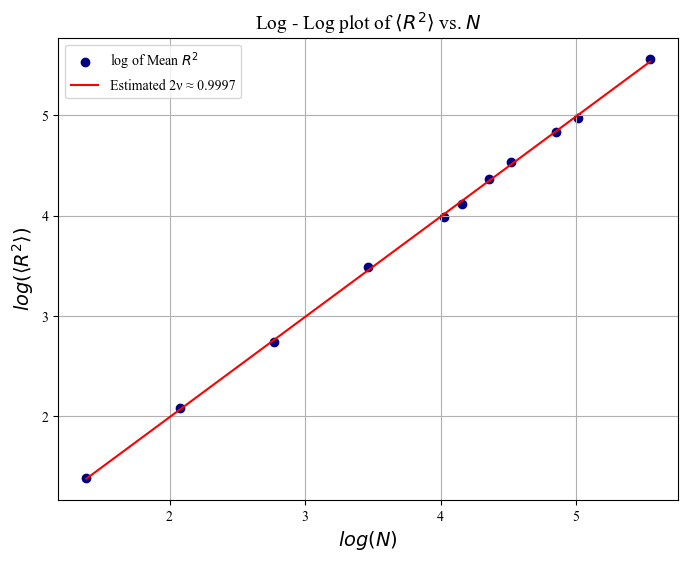

In [499]:
#log-log plot to estimate the flory parameter 
N_list = np.array([4, 8, 16, 32, 56, 64, 78, 92, 128, 150, 256])
mean_square_distances = np.array([])

for N in N_list:
    mean_square_distance = mean_square_end_to_end_distance(N, num_samples=1000)
    mean_square_distances = np.concatenate((mean_square_distances, np.array([mean_square_distance])))

log_Nrw = np.log(N_list)
log_Rrw = np.log(mean_square_distances)

m, c = np.polyfit(log_Nrw, log_Rrw, 1)
log_Rrw_2 = m * log_Nrw + c  # Generate the best fit line with the same length as log_Nrw

plt.figure(figsize=(8, 6))
plt.scatter(log_Nrw, log_Rrw, marker='o', color='navy', label = r'log of Mean $R^2$')
plt.plot(log_Nrw, log_Rrw_2, color='red', label=f'Estimated 2ν ≈ {m:.4f}')
plt.xlabel('$log(N)$', fontsize=14)
plt.ylabel(r'$log(\langle R^2 \rangle)$', fontsize=14)
plt.title(r'Log - Log plot of $\langle R^2 \rangle$ vs. $N$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

## 2D SAW: Basic algorithm

In [676]:
#function to generate the SAW
def self_avoiding_walk(cols, rows, desired_step_length):
    # Initialize the starting point
    x, y = cols//2, rows//2

    # Create the grid
    grid = [[False for _ in range(rows)] for _ in range(cols)]
    grid[x][y] = True

    # Check if the next move is valid
    def isValid(i, j):
        if i < 0 or i >= cols or j < 0 or j >= rows:
            return False
        return not grid[i][j]

    path = [(x, y)]
    current_step = 0

    while current_step < desired_step_length:
        options = []
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            newX, newY = x + dx, y + dy
            if isValid(newX, newY):
                options.append((dx, dy))

        if options:
            step = random.choice(options)
            x += step[0]
            y += step[1]
            grid[x][y] = True
            path.append((x, y))
            current_step += 1
        else:
            # Return the path and False if the walker is stuck
            return zip(*path), False

    # Return the path and True if the walker is not stuck
    return zip(*path), True

#---------------------------------------------
#function for estimating mean R^2
def SAW_rsq(N, num_samples=10000):
    squared_distances = np.zeros(num_samples)

    for i in range(num_samples):
        (x, y), completed = self_avoiding_walk(cols=30, rows=30, desired_step_length=N)

        if completed:  # Only calculate if the walker is not stuck
            squared_distance = (x[-1] - x[0])**2 + (y[-1] - y[0])**2
            squared_distances[i] = squared_distance

    # Filter out the zeros which represent incomplete walks
    completed_distances = squared_distances[squared_distances > 0]

    # Calculate the mean square distance only for completed walks
    if completed_distances.size > 0:
        mean_square_distance = np.mean(completed_distances)
    else:
        mean_square_distance = 0  # No completed walks

    return mean_square_distance

#---------------------------------------------
#function for fraction of successful walks 
def success_fraction(N, num_samples=10000):
    successful_walks = 0

    for _ in range(num_samples):
        _, completed = self_avoiding_walk(cols=30, rows=30, desired_step_length=N)
        if completed:
            successful_walks += 1

    return successful_walks / num_samples

def exponential_SAW(x, a, b):
    return a * np.exp(-b * x**1.8)

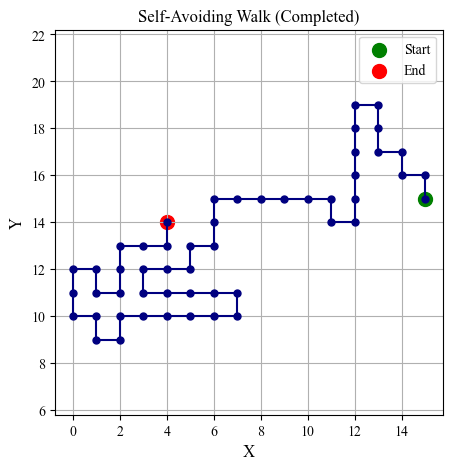

In [677]:
#store the walker coordinate values 
(x_coords, y_coords), completed = self_avoiding_walk(cols = 30, rows = 30, desired_step_length = 50)

#plot the walk 
plt.figure(figsize=(5, 5))
plt.scatter(x_coords[0], y_coords[0], color='green', label='Start', s=100)  # Marking the start point in green
plt.scatter(x_coords[-1], y_coords[-1], color='red', label='End', s=100)  # Marking the end point in red
plt.plot(x_coords, y_coords, marker='o', color='navy', markersize=5)

plt.xlabel("X", fontsize = 12)
plt.ylabel("Y", fontsize = 12)
plt.grid(True)
plt.axis('equal')
plt.legend()
if completed:
    plt.title("Self-Avoiding Walk (Completed)", fontsize = 12)
else:
    plt.title("2-D Self-Avoiding Walk for 50 steps (Stuck at step {})".format(len(x_coords)), fontsize = 12)
plt.show()

## 2-D Basic SAW: Probability distribution of R

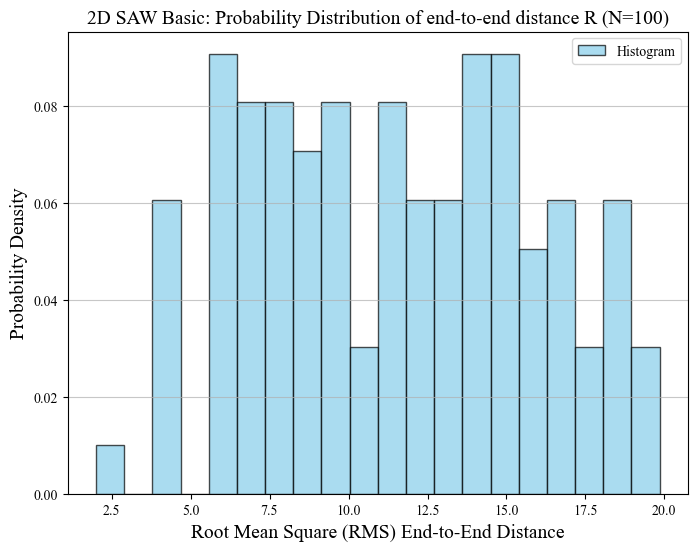

In [687]:
def R_distribution(N, num_samples=1000):
    squared_distances = np.zeros(num_samples)

    for i in range(num_samples):
        (x, y), completed = self_avoiding_walk(cols=30, rows=30, desired_step_length=N)

        if completed:  # Only calculate if the walker is not stuck
            squared_distance = (x[-1] - x[0])**2 + (y[-1] - y[0])**2
            squared_distances[i] = squared_distance

    completed_distances = squared_distances[squared_distances > 0]
    completed_distances_sqrt = np.sqrt(completed_distances)

    plt.figure(figsize=(8, 6))
    plt.hist(completed_distances_sqrt, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')

    plt.xlabel('Root Mean Square (RMS) End-to-End Distance', fontsize = 14)
    plt.ylabel('Probability Density', fontsize = 14)
    plt.title(f'2D SAW Basic: Probability Distribution of end-to-end distance R (N={N})', fontsize=14)
    plt.legend()
    plt.grid(axis='y', alpha=0.7)
    plt.show()

R_distribution(100, num_samples=1000)


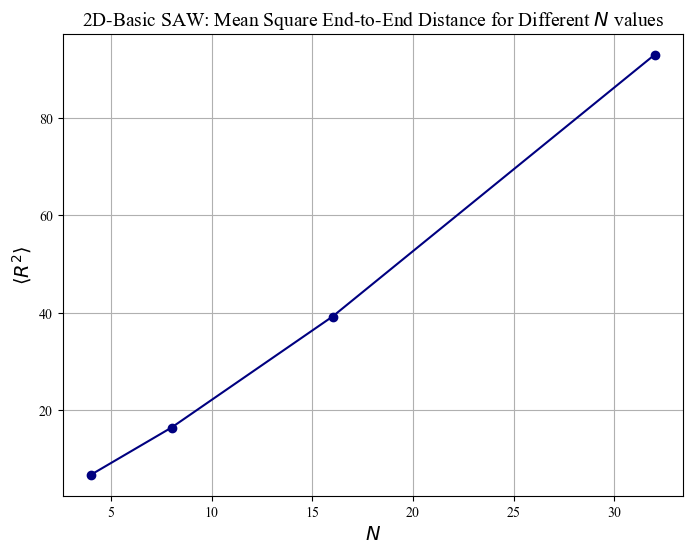

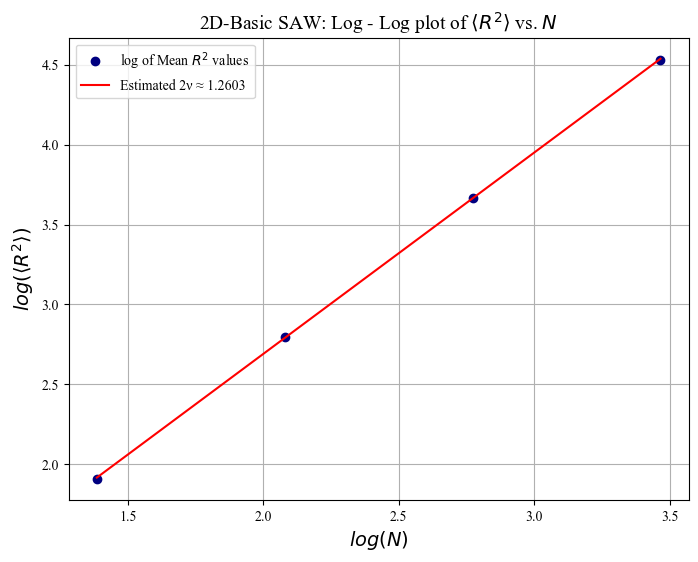

In [506]:
N_list = np.array([4,8,16,32]) #values of N for walker to take 
mean_square_distances = np.array([]) #empty array to store mean R^2 values 

for N in N_list:
    mean_square_distance = SAW_rsq(N, num_samples=10000)
    mean_square_distances = np.concatenate((mean_square_distances, np.array([mean_square_distance])))

#R^2 vs N for the walk 
plt.show()    
plt.figure(figsize=(8, 6))
plt.plot(N_list, mean_square_distances, marker='o', color='navy')
plt.xlabel('$N$', fontsize = 14)
plt.ylabel(r'$\langle R^2 \rangle$', fontsize = 14)
plt.title('2D-Basic SAW: Mean Square End-to-End Distance for Different $N$ values', fontsize = 14)
plt.grid()
plt.show()


#log-log plot of R^2 vs N 
log_N = np.log(N_list)
log_R2 = np.log(mean_square_distances)
m,c = np.polyfit(log_N , log_R2, 1)
log_R2_2 = [m*i + c for i in log_N]

plt.figure(figsize=(8, 6))
plt.plot(log_N , log_R2, marker='o', color='navy', linestyle ='', label=r'log of Mean $R^2$ values')
plt.plot(log_N , log_R2_2, color='red', label = f'Estimated 2ν ≈ {m:.4f}')
plt.xlabel('$log(N)$', fontsize = 14)
plt.ylabel(r'$log(\langle R^2 \rangle)$', fontsize = 14)
plt.title(r'2D-Basic SAW: Log - Log plot of $\langle R^2 \rangle$ vs. $N$', fontsize = 14)
plt.legend()
plt.grid()
plt.show()

100%|██████████| 100/100 [00:25<00:00,  3.95it/s]


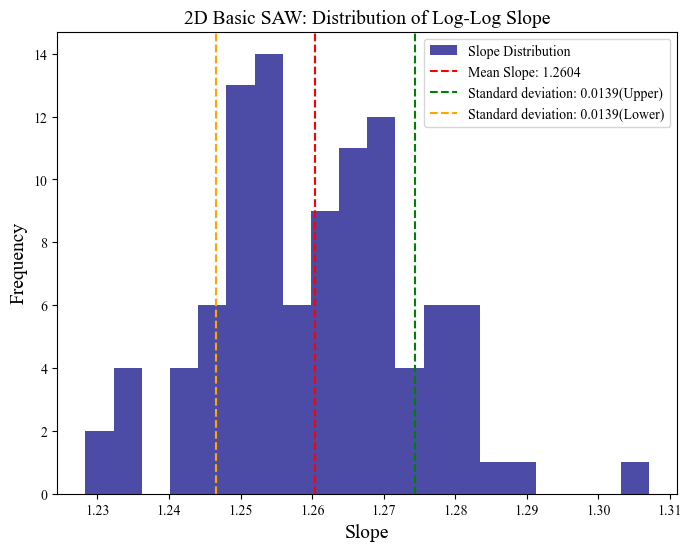

In [692]:
#function to generate the slope values over given iterations for basic SAW

def basic_SAW_slope_calculation(N_values, num_iterations, num_samples=10000):
    slope_values = []

    for _ in tqdm(range(num_iterations)):
        R2_values = []  # List to store R^2 values for different N
        for N in N_values:
            mean_square_distance = SAW_rsq(N, num_samples=num_samples)
            R2_values.append(mean_square_distance)

        log_N = np.log(N_values)
        log_R2 = np.log(R2_values)
        slope, _ = np.polyfit(log_N, log_R2, 1)
        slope_values.append(slope)

    return slope_values

N_values = [4, 8, 16, 32]
num_iterations = 100  # Number of iterations to calculate slope
num_samples = 1000  # Number of samples for SAW
slope_values = basic_SAW_slope_calculation(N_values, num_iterations, num_samples)

# Calculate mean and standard deviation
mean_slope = np.mean(slope_values)
std_dev_slope = np.std(slope_values)

# Plotting the distribution of slopes
plt.figure(figsize=(8, 6))
plt.hist(slope_values, bins=20, color='navy', alpha=0.7, label='Slope Distribution')
plt.axvline(x=mean_slope, color='red', linestyle='--', label=f'Mean Slope: {mean_slope:.4f}')
plt.axvline(x=mean_slope + std_dev_slope, color='green', linestyle='--', label=f'Standard deviation: {std_dev_slope:.4f}(Upper)')
plt.axvline(x=mean_slope - std_dev_slope, color='orange', linestyle='--', label=f'Standard deviation: {std_dev_slope:.4f}(Lower)')

plt.xlabel('Slope', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('2D Basic SAW: Distribution of Log-Log Slope', fontsize=14)
plt.legend()
plt.show()


C:\Users\Kasturi\AppData\Local\Temp\ipykernel_3172\4004167632.py:76: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x**1.8)


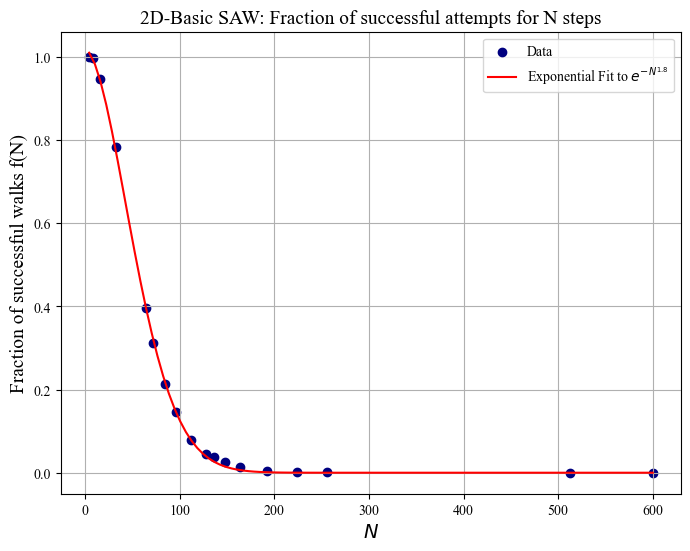

In [597]:
#Fraction of successful attempts for basic SAW
N_list = np.array([4,8,16,32,64, 72, 84, 96, 112,128, 136, 148, 164, 192, 224, 256, 512, 600])
fractions = [success_fraction(N) for N in N_list]

#Curve fitting to the exponential function
popt, _ = curve_fit(exponential_SAW, N_list, fractions)
fit_x = np.linspace(min(N_list), max(N_list), 100)
fit_y = exponential_SAW(fit_x, *popt)

#Plotting the fraction 
plt.figure(figsize=(8, 6))
plt.scatter(N_list, fractions, color='navy', marker='o', label='Data')
plt.plot(fit_x, fit_y, color='red', label='Exponential Fit to $e^{-N^{1.8}}$')
plt.xlabel('$N$', fontsize = 14)
plt.ylabel('Fraction of successful walks f(N)', fontsize = 14)
plt.title('2D-Basic SAW: Fraction of successful attempts for N steps', fontsize = 14)
plt.legend()
plt.grid()
plt.show()

In [474]:
#Estimating CPU time for successful attempts 
def CPU_success(N):
    num_successful_walks = 0
    num_trials = 5  # Number of trials for each N value

    start_time = time.time()

    for _ in range(num_trials):
        path, is_not_stuck = self_avoiding_walk(N, N, desired_step_length=N)
        if is_not_stuck:
            num_successful_walks += 1

    end_time = time.time()
    cpu_time = end_time - start_time

    fraction = num_successful_walks / num_trials
    print(f"For N = {N}, CPU Time = {cpu_time:.4f} seconds")

    return fraction

# Define N_list
N_list = np.array([4, 30, 60, 100, 200, 300, 400, 500, 1000])

# Calculate fractions and print CPU time for successful walks
fractions = [CPU_success(N) for N in N_list]


For N = 4, CPU Time = 0.0010 seconds
For N = 30, CPU Time = 0.0009 seconds
For N = 60, CPU Time = 0.0011 seconds
For N = 100, CPU Time = 0.0018 seconds
For N = 200, CPU Time = 0.0063 seconds
For N = 300, CPU Time = 0.0126 seconds
For N = 400, CPU Time = 0.0242 seconds
For N = 500, CPU Time = 0.0203 seconds
For N = 1000, CPU Time = 0.1748 seconds


## Comparison between the 2D-SAW and 2D RW plots

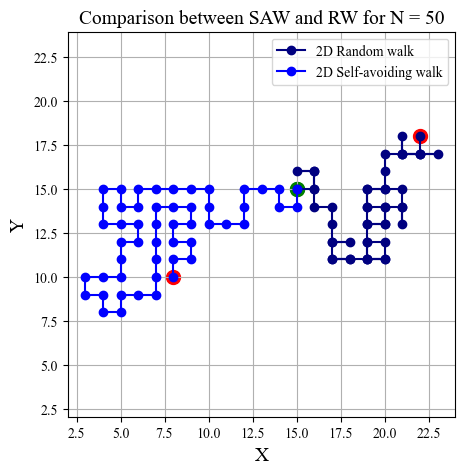

In [508]:
x, y = generate_rw(50)
(x_coords, y_coords), completed = self_avoiding_walk(cols = 30, rows = 30, desired_step_length = 50)

#plotting the walkers 
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'navy', marker='o', label ='2D Random walk')
plt.plot(x_coords, y_coords, marker='o', color='blue', label ='2D Self-avoiding walk')
plt.scatter(x[0], y[0], color='green', s=100)  # Marking the start point in green for both the walkers
plt.scatter(x[-1], y[-1], color='red', s=100)  # Marking the end point in red for both the walkers 
plt.scatter(x_coords[0], y_coords[0], color='green', s=100)  
plt.scatter(x_coords[-1], y_coords[-1], color='red', s=100)  
plt.xlabel('X', fontsize = 14)
plt.ylabel('Y', fontsize = 14)
plt.title(f'Comparison between SAW and RW for N = 50', fontsize = 14)

plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

# 2-D SAW: Myopic Algorithm
This algorithm differs from the ESS (Basic SAW) algorithm in the sense it takes only those directions which are feasible instead of considering all as feasible, thus sampling from a different probability distribution for the directions.

In [555]:
#function to generate the SAW
def Myopic_SAW(N):
    x, y = np.array([0]), np.array([0])
    visited_positions = set([(0, 0)])  #store all visited sites by the walk
    stop = 0 #whether the walk stopped due to reaching N or trapping itself 
    steps = 0 #counter to keep track of steps 

    for i in range(N):
        directions = np.array([(1, 0), (0, 1), (-1, 0), (0, -1)]) #possible directions
        feasible_directions = np.zeros((0, 2), int) #feasible directions 
        for dx, dy in directions:
            new_position = (x[-1] + dx, y[-1] + dy)

            if new_position not in visited_positions:
                feasible_directions = np.concatenate((feasible_directions, np.array([[dx, dy]])))

        if feasible_directions.shape[0] > 0:
            dx, dy = feasible_directions[np.random.randint(0, feasible_directions.shape[0])]  # Choose a direction at random among available ones
            new_position = (x[-1] + dx, y[-1] + dy)
            visited_positions.add(new_position)
            x = np.concatenate((x, [x[-1] + dx]))
            y = np.concatenate((y, [y[-1] + dy]))
        else: # if no directions available, walker stops 
            stop = 1
            steps = i + 1 # number of steps taken before stopping 
            break 

    return x, y, stop, steps


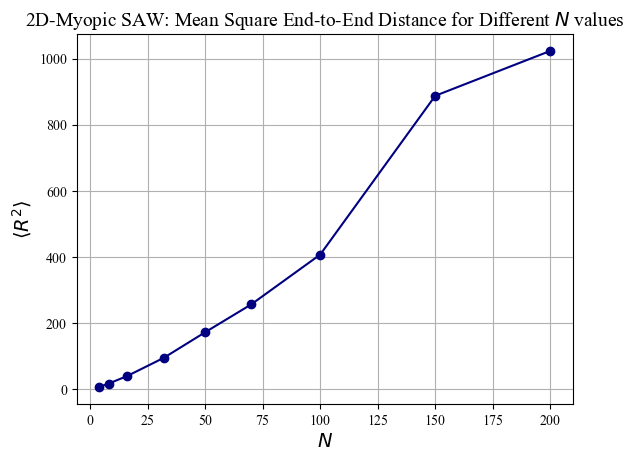

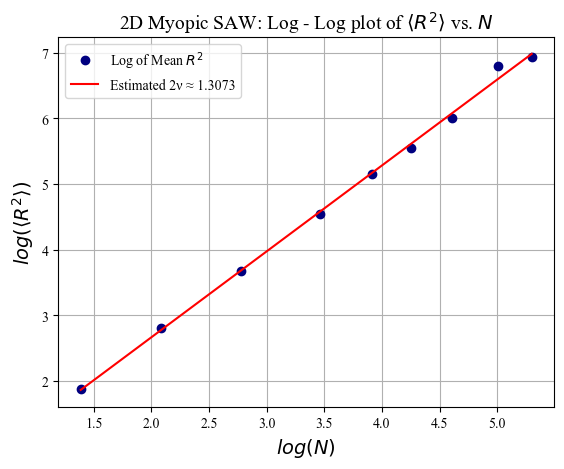

In [576]:
#function to estimate mean R^2 
def mean_square_end_to_end_distance(N, num_samples=1000):
    squared_distances = np.array([])

    for _ in range(num_samples):
        x, y, stop, _ = Myopic_SAW(N)

        if not stop:
            squared_distance = (x[-1] - x[0])**2 + (y[-1] - y[0])**2
            squared_distances = np.concatenate((squared_distances, np.array([squared_distance])))

    mean_square_distance = np.mean(squared_distances)
    return mean_square_distance

N_list = np.array([4, 8, 16, 32, 50, 70, 100, 150, 200])
mean_square_distances = np.array([])

for N in N_list:
    mean_square_distance = mean_square_end_to_end_distance(N, num_samples=1000)
    mean_square_distances = np.concatenate((mean_square_distances, np.array([mean_square_distance])))

#Plot of Mean R^2 vs N 
plt.plot(N_list, mean_square_distances, marker='o', color='navy', label='Mean $R^2$')
plt.xlabel('$N$', fontsize=14)
plt.ylabel(r'$\langle R^2 \rangle$', fontsize=14)
plt.title('2D-Myopic SAW: Mean Square End-to-End Distance for Different $N$ values', fontsize=14)
plt.grid()
plt.show()

log_N = np.log(N_list)
log_R2 = np.log(mean_square_distances)
m,c = np.polyfit(log_N , log_R2, 1)
log_R2_2 = [m*i + c for i in log_N]

#log-log plot of mean R^2 vs N 
plt.plot(log_N , log_R2, marker='o', color='navy', linestyle = '',label = 'Log of Mean $R^2$')
plt.plot(log_N , log_R2_2, color='red', label = f'Estimated 2ν ≈ {m:.4f}')
plt.xlabel('$log(N)$', fontsize=14)
plt.ylabel(r'$log(\langle R^2 \rangle)$', fontsize=14)
plt.title(r'2D Myopic SAW: Log - Log plot of $\langle R^2 \rangle$ vs. $N$', fontsize=14)
plt.grid()
plt.legend()
plt.show()

In [610]:
def success_fraction(N, samples):
    fails, lengths = np.zeros(samples), np.zeros(samples)
    for i in range(samples):
        _, _, stop, steps = Myopic_SAW(N)
        fails[i] = stop
        lengths[i] = steps
    return fails, lengths

N_values = [4,8,16,32, 64, 72, 84, 96, 112, 128, 136, 152, 174, 212, 232, 256, 512, 600]
results_success, results_cum_success = np.array([]), np.array([])

for N in tqdm(N_list):
    fails, lengths = success_fraction(N, 10000)
    success_rate = (1 - np.mean(fails))
    results_success = np.concatenate((results_success, [success_rate]))

100%|██████████| 18/18 [04:45<00:00, 15.88s/it]


C:\Users\Kasturi\AppData\Local\Temp\ipykernel_3172\3141926387.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x**1.35)


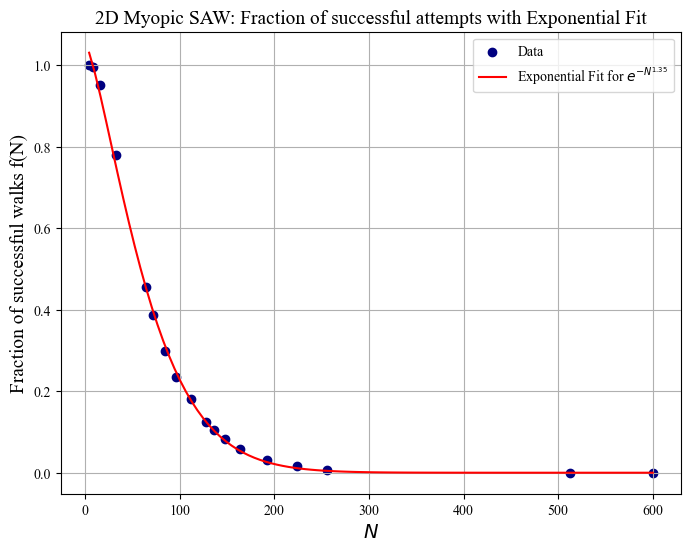

In [611]:
def exponential_func(x, a, b):
    return a * np.exp(-b * x**1.35)

#Fitting the curve to data 
popt, _ = curve_fit(exponential_func, N_list, results_success)

fit_x1 = np.linspace(min(N_list), max(N_list), 100)
fit_y1 = exponential_func(fit_x1, *popt)

# Plotting the original data and the fitted exponential curve
plt.figure(figsize=(8, 6))
plt.scatter(N_list, results_success, color='navy', marker='o', label='Data')
plt.plot(fit_x1, fit_y1, color='red', label='Exponential Fit for $e^{-N^{1.35}}$')

plt.xlabel('$N$', fontsize = 14)
plt.ylabel('Fraction of successful walks f(N)', fontsize = 14)
plt.title('2D Myopic SAW: Fraction of successful attempts with Exponential Fit', fontsize=14)
plt.grid()
plt.legend()
plt.show()

## 2D Myopic SAW: Probability distribution of R 

100%|██████████| 1000/1000 [00:01<00:00, 510.90it/s]


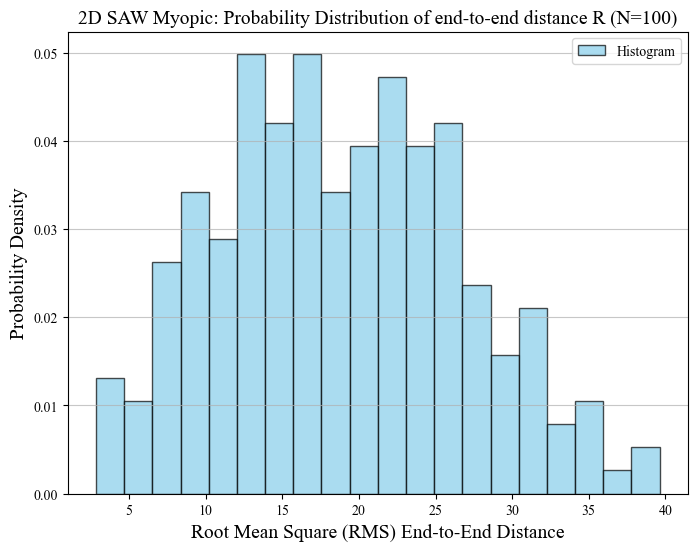

In [686]:
#Probability distribution of R 
def plot_end_to_end_distance_distribution(N, num_samples=1000):
    end_to_end_distances = []

    for _ in tqdm(range(num_samples)):
        x, y, stop, _ = Myopic_SAW(N)

        if not stop:
            squared_distance = (x[-1] - x[0])**2 + (y[-1] - y[0])**2
            end_to_end_distances.append(np.sqrt(squared_distance))

    plt.figure(figsize=(8, 6))
    plt.hist(end_to_end_distances, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')

    plt.xlabel('Root Mean Square (RMS) End-to-End Distance', fontsize = 14)
    plt.ylabel('Probability Density', fontsize = 14)
    plt.title(f'2D SAW Myopic: Probability Distribution of end-to-end distance R (N={N})', fontsize=14)
    plt.legend()
    plt.grid(axis='y', alpha=0.7)
    plt.show()

plot_end_to_end_distance_distribution(100, num_samples=1000)


# 2-D SAW: Rosenbluth Algorithm

In [701]:
#function to generate the SAW 
def rosenbluth_sampling(max_steps, num_trials):
    #Initializing the variables
    total_weighted_R_squared = 0.0
    total_weights = 0.0
    successful_walks = 0  #Counter for successful walks

    # Loop through multiple trials
    for _ in range(num_trials):
        lattice = np.zeros((2 * max_steps, 2 * max_steps), dtype=bool) #boolean type data to store the lattice points 
        x, y = max_steps, max_steps
        lattice[x, y] = True
        path = [(x, y)]

        weights = [1.0]  #Initialize weights
        R_squared = 0.0

        # Perform steps for the walker
        for _ in range(1, max_steps):
            #Define possible directions as Left, Up, Right, Down
            possible_steps = [(0, -1), (-1, 0), (0, 1), (1, 0)]
            random.shuffle(possible_steps) #change the order of the elements in the list randomly 
            #for directions to be randomly picked 
            valid_moves = []

            # Check available valid moves
            for dx, dy in possible_steps:
                new_x, new_y = x + dx, y + dy
                if 0 <= new_x < 2 * max_steps and 0 <= new_y < 2 * max_steps and not lattice[new_x, new_y]:
                    valid_moves.append((dx, dy))

            total_possible_moves = len(valid_moves)

            if total_possible_moves == 0:
                weights.append(0.0)
                break  # Case 1: Terminate if no available moves

            elif total_possible_moves < 3:  # Case 2: fewer than 3 steps possible
                weight = total_possible_moves / 3 * weights[-1]  # Calculate weight as number of directions 
                #available/3 multiplied by the weight of the previous walk 
                weights.append(weight)

            else:
                weights.append(weights[-1])  # Case 3: All three steps are possible
                #the weight from the previous walk carries on 

            selected_move = random.choice(valid_moves)
            dx, dy = selected_move
            x, y = x + dx, y + dy

            lattice[x, y] = True
            path.append((x, y))

            R_squared = (x - max_steps) ** 2 + (y - max_steps) ** 2 #R^2 calculation 

        # Calculate total weighted R squared
        total_weighted_R_squared += weights[-1] * R_squared
        total_weights += weights[-1]

        # Check if the walk reached the maximum number of steps
        if len(path) == max_steps:
            successful_walks += 1

    # Calculate fraction of successful walks and return mean weighted R^2
    if total_weights > 0:
        fraction_successful_walks = successful_walks / num_trials
        return total_weighted_R_squared / total_weights, fraction_successful_walks
    else:
        return 0.0, 0.0  #Return 0 if no valid walks were found

In [589]:
def exponential_Rosen(x, a, b):
    return a * np.exp(-b * x**(1.4))


N_values = [4,8,16,32, 64, 128, 256]  # Define N_values
num_walks = 10000

log_N_values = []
log_R2_values = []
fraction_successful_walks_values = []

if len(fraction_successful_walks_values) != len(N_values):
    fraction_successful_walks_values = fraction_successful_walks_values[:len(N_values)]

for N in tqdm(N_values):
    R2_values, fraction_successful_walks = rosenbluth_sampling(N, num_walks)
    log_N_values.append(np.log(N))  # Append log(N)
    log_R2_values.append(np.log(R2_values))  # Append log(R2)
    fraction_successful_walks_values.append(fraction_successful_walks)  # Append fraction of successful walks

100%|██████████| 7/7 [00:10<00:00,  1.46s/it]


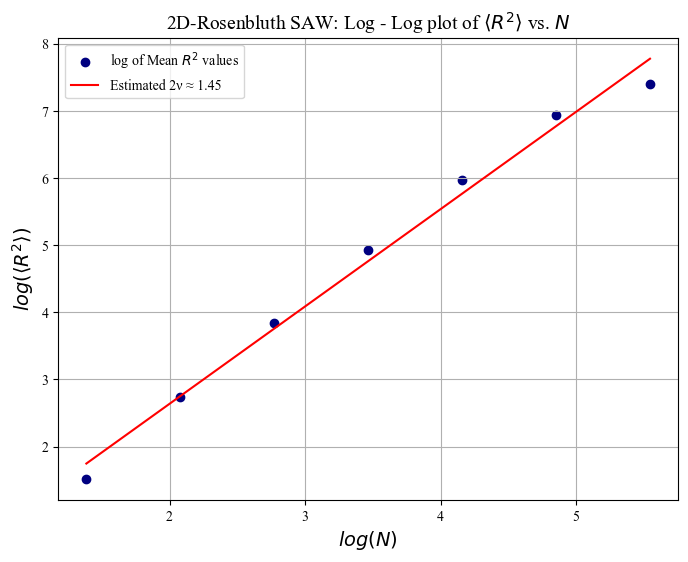

In [512]:
#Plot the log-log plot of Mean R^2 vs N     
plt.figure(figsize=(8, 6))
plt.scatter(log_N_values, log_R2_values, label=r'log of Mean $R^2$ values', color='navy')
plt.xlabel('$log(N)$', fontsize = 14)
plt.ylabel(r'$log(\langle R^2 \rangle)$', fontsize = 14)
plt.title(r'2D-Rosenbluth SAW: Log - Log plot of $\langle R^2 \rangle$ vs. $N$', fontsize = 14)

#Estimate the flory parameter as half the slope of the log-log graph
coeffs = np.polyfit(log_N_values, log_R2_values, 1)
estimated_nu = coeffs[0] 
plt.plot(log_N_values, np.polyval(coeffs, log_N_values), color='red',
             label=f'Estimated 2ν ≈ {estimated_nu:.2f}')
plt.legend()
plt.grid()
plt.show()

## 2-D Rosebluth: Probability distribution for R 

100%|██████████| 1000/1000 [00:24<00:00, 40.91it/s]


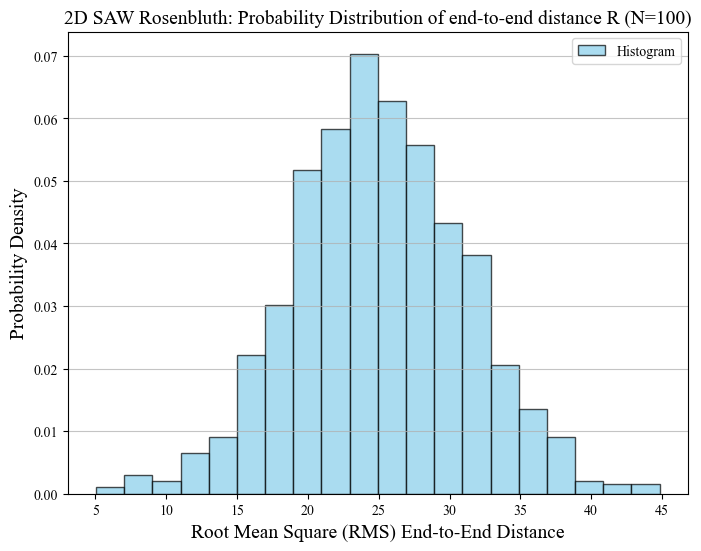

In [669]:
def R_distribution(N, num_walks=100):
    RMS_distances = []

    for _ in tqdm(range(num_walks)):
        rsq, _ = rosenbluth_sampling(N, num_trials=100)
        RMS_distances.append(np.sqrt(rsq))

    # Fit Gaussian
    mu, sigma = norm.fit(RMS_distances)

    plt.figure(figsize=(8, 6))
    plt.hist(RMS_distances, bins=20, density=True, color='skyblue',edgecolor = 'black', alpha=0.7, label='Histogram')
    
    xmin, xmax = plt.xlim()
    x_values = np.linspace(xmin, xmax, 100)

    plt.xlabel('Root Mean Square (RMS) End-to-End Distance', fontsize = 14)
    plt.ylabel('Probability Density', fontsize = 14)
    plt.title(f'2D SAW Rosenbluth: Probability Distribution of end-to-end distance R (N={N})', fontsize=14)
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()


R_distribution(100, num_walks=1000)


## Histogram to estimate the average slope value over 100 executions 

100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


Mean Slope: 1.6355
Standard Deviation of Slope: 0.0256


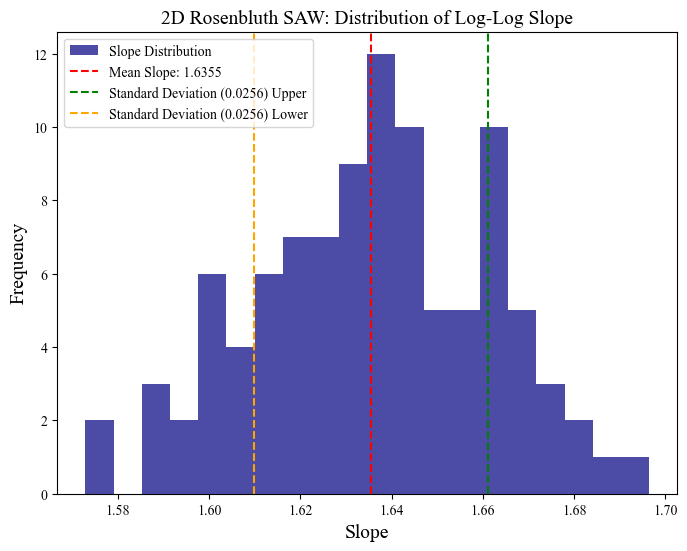

In [689]:
#function to generate the slope values over given iterations
def rosenbluth_slope_calculation(N_values, num_iterations, num_walks):
    slope_values = []

    for _ in tqdm(range(num_iterations)):
        log_R2_values = []
        log_N_values = []

        for N in N_values:
            R2_values, _ = rosenbluth_sampling(N, num_walks)
            log_N_values.append(np.log(N))
            log_R2_values.append(np.log(R2_values))

        coeffs = np.polyfit(log_N_values, log_R2_values, 1)
        estimated_nu = coeffs[0]
        slope_values.append(estimated_nu)

    return slope_values

# Define parameters
N_values = [4, 8, 16, 32]
num_iterations = 100  # Number of iterations to calculate slope
num_walks = 1000

slope_values = rosenbluth_slope_calculation(N_values, num_iterations, num_walks)

# Calculate mean and standard deviation
mean_slope = np.mean(slope_values)
std_dev_slope = np.std(slope_values)

# Plotting the distribution of slopes
plt.figure(figsize=(8, 6))
plt.hist(slope_values, bins=20, color='navy', alpha=0.7, label='Slope Distribution')
plt.axvline(x=mean_slope, color='red', linestyle='--', label=f'Mean Slope: {mean_slope:.4f}')

#standard deviation limits plotted 
plt.axvline(x=mean_slope + std_dev_slope, color='green', linestyle='--', label=f'Standard Deviation ({std_dev_slope:.4f}) Upper')
plt.axvline(x=mean_slope - std_dev_slope, color='orange', linestyle='--', label=f'Standard Deviation ({std_dev_slope:.4f}) Lower')

plt.xlabel('Slope', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('2D Rosenbluth SAW: Distribution of Log-Log Slope', fontsize = 14)
plt.legend()

# Print mean and standard deviation
print(f"Mean Slope: {mean_slope:.4f}")
print(f"Standard Deviation of Slope: {std_dev_slope:.4f}")
plt.show()

 89%|████████▉ | 16/18 [00:37<00:06,  3.41s/it]C:\Users\Kasturi\AppData\Local\Temp\ipykernel_3172\3484627967.py:13: RuntimeWarning: divide by zero encountered in log
  log_R2_values.append(np.log(R2_values))
100%|██████████| 18/18 [00:44<00:00,  2.48s/it]
C:\Users\Kasturi\AppData\Local\Temp\ipykernel_3172\761473826.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x**(1.4))


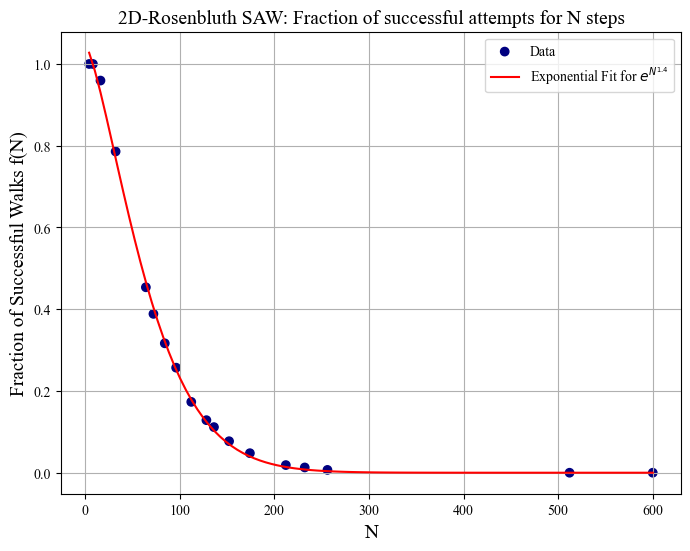

In [594]:
#Fraction of Successful attempts 
#We take a larger range for N to see the exponential nature of the graph well 
N_values = [4,8,16,32, 64, 72, 84, 96, 112, 128, 136, 152, 174, 212, 232, 256, 512, 600]
fraction_successful_walks_values = []
num_walks = 10000

if len(fraction_successful_walks_values) != len(N_values):
    fraction_successful_walks_values = fraction_successful_walks_values[:len(N_values)]

for N in tqdm(N_values):
    R2_values, fraction_successful_walks = rosenbluth_sampling(N, num_walks)
    log_N_values.append(np.log(N)) 
    log_R2_values.append(np.log(R2_values)) 
    fraction_successful_walks_values.append(fraction_successful_walks)  # Append fraction of successful walks

#Curve-fitting the graph for exponential functional defined for Rosenbluth    
popt, _ = curve_fit(exponential_Rosen, N_values, fraction_successful_walks_values)
fit_x2 = np.linspace(min(N_values), max(N_values), 100)
fit_y2 = exponential_Rosen(fit_x2, *popt)

#Plotting the fraction of successful attempts
plt.figure(figsize=(8, 6))
plt.scatter(N_values, fraction_successful_walks_values, marker='o', label='Data', color='navy', linestyle='')
plt.plot(fit_x2, fit_y2, color='red', label='Exponential Fit for $e^{N^{1.4}}$')
plt.xlabel('N', fontsize = 14)
plt.ylabel('Fraction of Successful Walks f(N)', fontsize = 14)
plt.title('2D-Rosenbluth SAW: Fraction of successful attempts for N steps', fontsize = 14)
plt.legend()
plt.grid()
plt.show()

In [475]:
#Estimating average CPU time for Rosenbluth walkers
N_values = [4, 30, 60, 100, 200, 300, 400, 500, 1000]
num_walks = 5

# Perform the computation for each N value
for N in tqdm(N_values):
    start_time = time.time()
    R2_values, fraction_successful_walks = rosenbluth_sampling(N, num_walks)
    end_time = time.time()
    cpu_time = end_time - start_time
    
    print(f"For N = {N}: CPU Time for successful walks = {cpu_time:.4f} seconds")


100%|██████████| 9/9 [00:00<00:00, 581.40it/s]

For N = 4: CPU Time for successful walks = 0.0020 seconds
For N = 30: CPU Time for successful walks = 0.0007 seconds
For N = 60: CPU Time for successful walks = 0.0000 seconds
For N = 100: CPU Time for successful walks = 0.0010 seconds
For N = 200: CPU Time for successful walks = 0.0025 seconds
For N = 300: CPU Time for successful walks = 0.0021 seconds
For N = 400: CPU Time for successful walks = 0.0010 seconds
For N = 500: CPU Time for successful walks = 0.0020 seconds
For N = 1000: CPU Time for successful walks = 0.0010 seconds


### Errorbars estimation in Rosenbluth Algorithm

In [706]:
def calculate_EB(max_steps, num_trials):
    Rsq = []
    for _ in range(num_trials):
        result_Rsq, _ = rosenbluth_sampling(max_steps, 1)
        Rsq.append(result_Rsq)

    Rsq_values = np.array(Rsq) 
    mean_Rsq = np.mean(Rsq_values)
    variance = np.var(Rsq_values)
    standard_error = np.sqrt(variance / num_trials)

    return mean_Rsq, standard_error

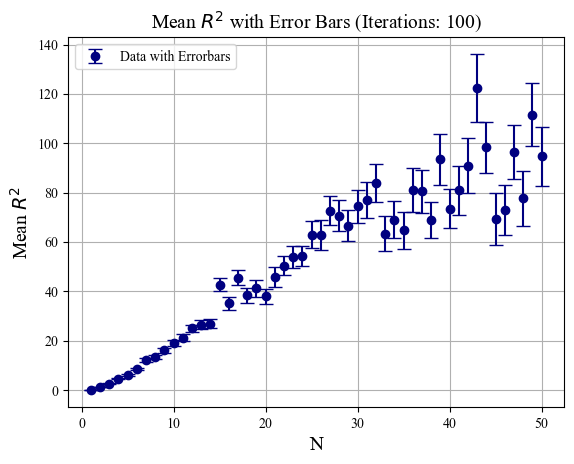

In [713]:
#function to calculate multiple steps
def calculate_steps(min_steps, max_steps, num_trials):
    mean_Rsq_values = []
    S_error_values = []

    for step_length in range(min_steps, max_steps + 1):
        mean_Rsq, S_error = calculate_EB(step_length, num_trials)
        mean_Rsq_values.append(mean_Rsq)
        S_error_values.append(S_error)
    return mean_Rsq_values, S_error_values

min_steps = 1  # Minimum number of steps
max_steps = 50  # Maximum number of steps
num_trials = 100  # Number of trials 

#estimate mean R^2 and Standard error values 
mean_Rsq_values, S_error_values = calculate_steps(min_steps, max_steps, num_trials)

#Final plot with errorbars 
step_lengths = np.arange(min_steps, max_steps + 1).reshape(-1, 1)
plt.errorbar(np.arange(min_steps, max_steps + 1), mean_Rsq_values, yerr=S_error_values, fmt='o', capsize=5, color = 'navy',label='Data with Errorbars')
plt.title(f'Mean $R^2$ with Error Bars (Iterations: {num_trials})', fontsize=14)
plt.xlabel('N', fontsize = 14)
plt.ylabel('Mean $R^2$', fontsize = 14)
plt.grid()

slope = 1.63

x_values = np.arange(min_steps, max_steps + 1)
y_values = slope * x_values 

plt.legend()
plt.show()


## Comparison for fraction of successful attempts for 2D-Basic SAW and Rosenbluth

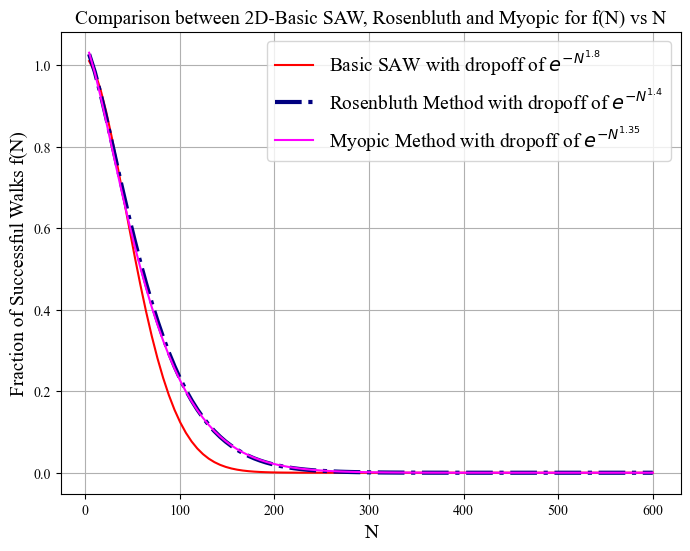

In [640]:
plt.figure(figsize=(8, 6))
# Plot the results of the Basic SAW method
plt.plot(fit_x, fit_y, color='red', label='Basic SAW with dropoff of $e^{-N^{1.8}}$')

# Plot the results of the Rosenbluth method
plt.plot(fit_x2, fit_y2, color='navy',  linestyle ='-.', linewidth = 3, label='Rosenbluth Method with dropoff of $e^{-N^{1.4}}$')

#Plot the results of the Myopic method 
plt.plot(fit_x1, fit_y1, color='magenta', label='Myopic Method with dropoff of $e^{-N^{1.35}}$')

plt.xlabel('N',fontsize = 14)
plt.ylabel('Fraction of Successful Walks f(N)', fontsize = 14)
plt.title('Comparison between 2D-Basic SAW, Rosenbluth and Myopic for f(N) vs N', fontsize = 14)
plt.legend(fontsize=14)
plt.grid()
plt.show()


# 2D-SAW: Pivot Algorithm 

In [716]:
class Pivot_2D_SAW:
    def __init__(self, N, l0):
        self.N = N
        self.l0 = l0
        self.initial_state = np.column_stack((np.arange(N), np.zeros(N)))
        self.state = self.initial_state.copy()
        self.rotate_matrix = np.array([[[0, -1], [1, 0]], [[0, 1], [-1, 0]]])

    def pair_distances(self, chain1, chain2):
        distances = np.sqrt(np.sum((chain1[:, None] - chain2) ** 2, axis=-1))
        return distances

    def pivot_step(self):
        pivot_choose = np.random.randint(1, self.N - 1)
        side_choose = np.random.choice([-1, 1])

        if side_choose == 1:
            old_chain = self.state[:pivot_choose + 1]
            temp_chain = self.state[pivot_choose + 1:]
        else:
            old_chain = self.state[pivot_choose:]
            temp_chain = self.state[:pivot_choose]

        symtry_oprtr = self.rotate_matrix[np.random.randint(len(self.rotate_matrix))]
        new_chain = np.dot(temp_chain - self.state[pivot_choose], symtry_oprtr.T) + self.state[pivot_choose]

        pc_distance = self.pair_distances(new_chain, old_chain)

        if np.any(pc_distance < self.l0):
            return False
        else:
            if side_choose == 1:
                self.state[pivot_choose + 1:] = new_chain
            elif side_choose == -1:
                self.state[:pivot_choose] = new_chain
            return True

    def pivot_walk(self, t):
        accepted = 0
        while accepted < t:
            if self.pivot_step():
                accepted += 1

        self.state = self.l0 * (self.state - np.mean(self.state, axis=0))

    def plot_walk(self):
        x, y = self.state.T
        plt.figure(figsize=(10, 10))
        plt.plot(x, y, marker=".", linestyle="-", color='navy', ms = 0.5)
        plt.title("2D SAW: Pivot Algorithm", fontsize=18)
        plt.xlabel("X", fontsize=18)
        plt.ylabel("Y", fontsize=18)
        plt.axis('equal')
        plt.grid()
        plt.show()


  0%|          | 0/1 [00:00<?, ?it/s]

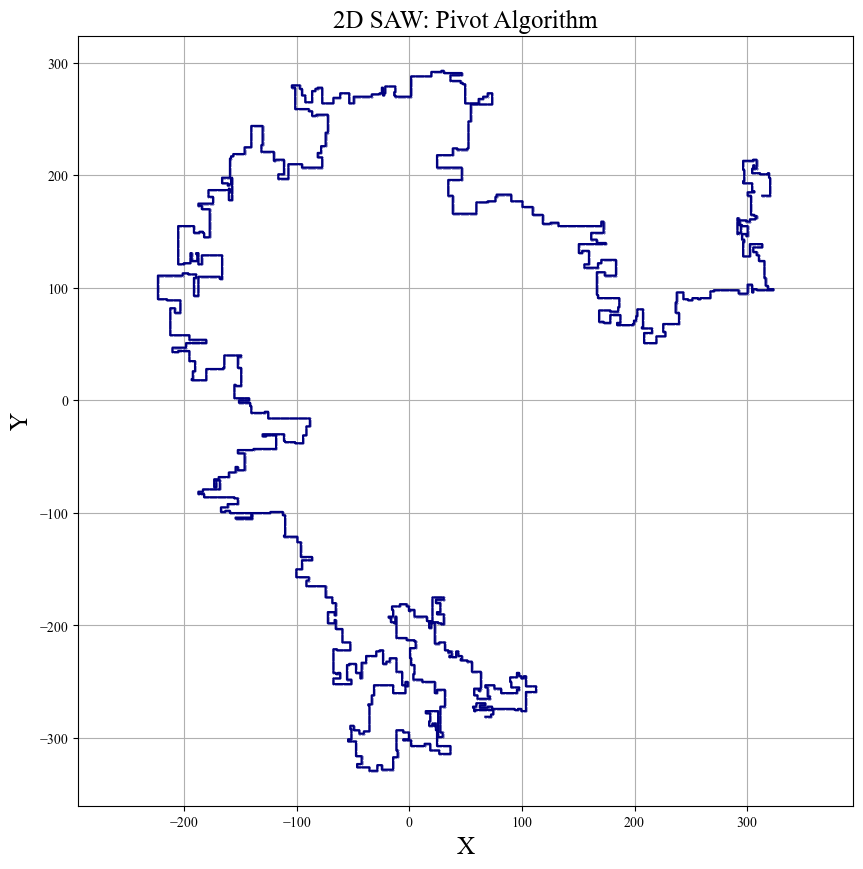

100%|██████████| 1/1 [06:48<00:00, 408.17s/it]

Successful walks: 1/1
CPU times: total: 6min 4s
Wall time: 6min 48s


In [717]:
%%time
#simulating the walk for 500 steps 
if __name__ == "__main__":
    N = 5000  # Number of monomers (steps)
    l0 = 1  # Bond length (step length)
    t = 1000  # Number of pivot steps
    num_trials = 1  # Number of attempts

    stuck_at_steps = []
    successful_walks = 0

    for _ in tqdm(range(num_trials)):
        chain_2d = Pivot_2D_SAW(N, l0)
        chain_2d.pivot_walk(t) 
        if len(chain_2d.state) == N:
            successful_walks += 1
        else:
            stuck_at_steps.append(len(chain_2d.state))

        # Plot the walker's path after each trial
        chain_2d.plot_walk()

    print(f"Successful walks: {successful_walks}/{num_trials}")
    if len(stuck_at_steps) > 0:
        print(f"I got stuck at: {stuck_at_steps}")

In the pivot algorithm, the large number of pivot steps lead to slower program or longer computational time due to its iterative nature. For larger systems or longer walks, higher values of t might be needed to achieve successful walks, thereby increasing computational cost.

100%|██████████| 25/25 [02:13<00:00,  5.32s/it]


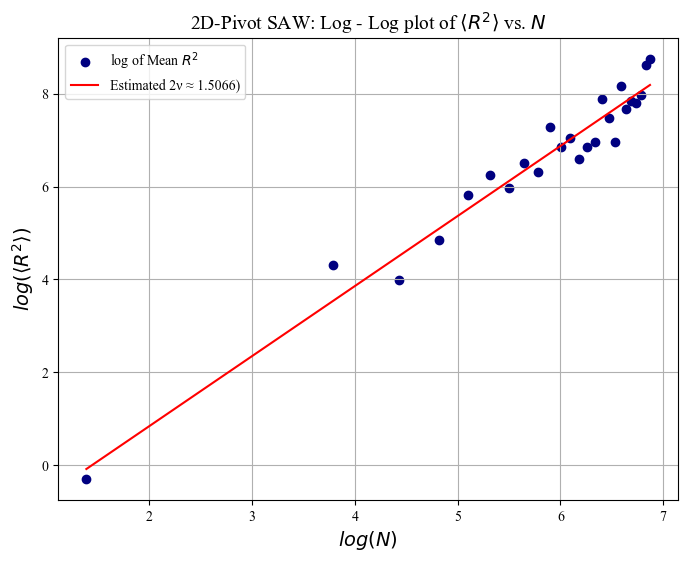

In [524]:
#function to estimate mean R^2
def calculate_mean_square_displacement(walk):
    center_of_mass = np.mean(walk, axis=0)
    displacement = walk - center_of_mass
    R_squared = np.sum(displacement ** 2) / len(walk)
    return R_squared


if __name__ == "__main__":
    max_N = 1000  # Maximum number of monomers (steps) to explore
    l0 = 1  # Bond length (step length)
    t = 1000  # Number of pivot steps - enhances the convergence rate 

    R_squared_values = []  # List to store R^2 values for different N
    for N in tqdm(range(4, 1000, 40)):  # Vary N from 10 to max_N in steps of 40
        chain_2d = Pivot_2D_SAW(N, l0)
        chain_2d.pivot_walk(t)
        R_squared = calculate_mean_square_displacement(chain_2d.state)
        R_squared_values.append(R_squared)

    # Plotting log-log relationship between R^2 and N
    log_N = np.log(range(4, 1000, 40))  # Log of N values
    log_R_squared = np.log(R_squared_values)  # Log of R^2 values

    plt.figure(figsize=(8, 6))
    plt.scatter(log_N, log_R_squared, color = 'navy', label=r'log of Mean $R^2$')
    plt.xlabel('$log(N)$', fontsize = 14)
    plt.ylabel(r'$log(\langle R^2 \rangle)$', fontsize = 14)
    plt.grid(True)

    # Estimate the exponent from the log-log plot
    slope, intercept = np.polyfit(log_N, log_R_squared, 1)

    # Generate line of best fit
    line_of_best_fit = np.polyval([slope, intercept], log_N)

    # Plot the line of best fit
    plt.plot(log_N, line_of_best_fit, color='red', label= f'Estimated 2ν ≈ {slope:.4f})')
    plt.title(r'2D-Pivot SAW: Log - Log plot of $\langle R^2 \rangle$ vs. $N$', fontsize = 14)
    plt.legend()
    plt.show()

## Histogram for slope values of log-log plot over 100 executions 

100%|██████████| 100/100 [00:42<00:00,  2.37it/s]


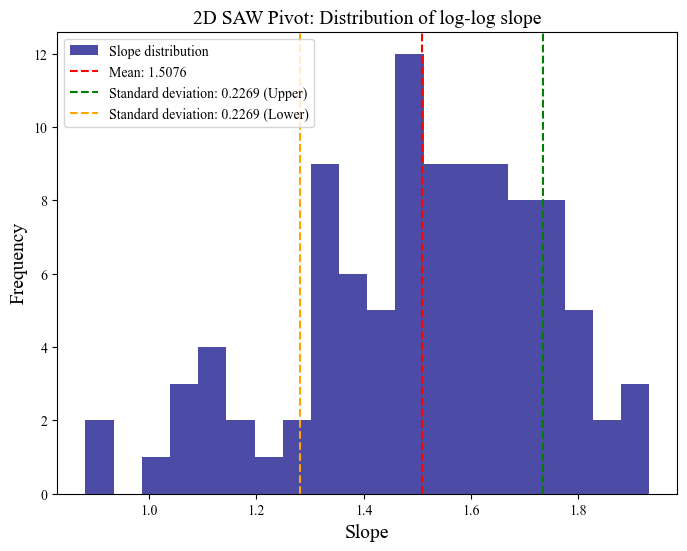

Mean slope: 1.5076
Standard Deviation of slope: 0.2269


In [690]:
def calculate_slope(num_executions):
    slope_values = []

    N_values = [4, 8, 16, 32] #array of N values 

    for _ in tqdm(range(num_executions)):
        R_squared_values = []  # List to store R^2 values for different N
        for N in N_values:  # Loop through specified N values
            chain_2d = Pivot_2D_SAW(N, l0)
            chain_2d.pivot_walk(t)
            R_squared = calculate_mean_square_displacement(chain_2d.state)
            R_squared_values.append(R_squared)

        log_N = np.log(N_values)  # Log of N values
        log_R_squared = np.log(R_squared_values)  # Log of R^2 values

        #Estimate the exponent from the log-log plot
        slope, _ = np.polyfit(log_N, log_R_squared, 1)
        slope_values.append(slope)

    return slope_values

# Number of executions for pivot algorithm
num_executions = 100

# Calculate slope values for multiple executions
slope_values = calculate_slope(num_executions)

# Plotting the distribution of slope values
plt.figure(figsize=(8, 6))
plt.hist(slope_values, bins=20, color='navy', alpha = 0.7, label="Slope distribution")
plt.xlabel('Slope', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('2D SAW Pivot: Distribution of log-log slope', fontsize=14)

#Calculate mean and standard deviation of slope values
mean_slope = np.mean(slope_values)
std_slope = np.std(slope_values)

# Plot mean and standard deviation lines on the histogram
plt.axvline(x=mean_slope, color='red', linestyle='--', label=f"Mean: {mean_slope:.4f}")
plt.axvline(x=mean_slope + std_slope, color='green', linestyle='--', label=f"Standard deviation: {std_slope:.4f} (Upper)")
plt.axvline(x=mean_slope - std_slope, color='orange', linestyle='--', label=f"Standard deviation: {std_slope:.4f} (Lower)")

plt.legend()
plt.show()

# Print mean and standard deviation
print(f"Mean slope: {mean_slope:.4f}")
print(f"Standard Deviation of slope: {std_slope:.4f}")


In [478]:
# Function to estimate computation time for different N values
def estimate_computation_time():
    # Define N values for the walker
    N_values = [4, 30, 60, 100, 200, 300, 400, 500, 1000]
    num_trials = 5  # Number of trials for each N value

    for N in N_values:
        start_time = time.time()

        # Perform trials for the specific N value
        for _ in range(num_trials):
            saw = Pivot_2D_SAW(N, l0=1.0)  # Create an instance of the Pivot_2D_SAW class
            saw.Pivot_walk(t=500)  # Perform the walk for 500 steps

        end_time = time.time()
        computation_time = end_time - start_time
        print(f"For N = {N}: Computation Time = {computation_time:.4f} seconds")

# Run the function to estimate computation time
estimate_computation_time()


For N = 4: Computation Time = 0.1946 seconds
For N = 30: Computation Time = 0.2828 seconds
For N = 60: Computation Time = 0.3681 seconds
For N = 100: Computation Time = 0.6082 seconds
For N = 200: Computation Time = 1.5641 seconds
For N = 300: Computation Time = 3.0917 seconds
For N = 400: Computation Time = 4.6838 seconds
For N = 500: Computation Time = 7.0778 seconds
For N = 1000: Computation Time = 35.7326 seconds


### Autocorrelation Function for Pivot 
The maximum number of lags suggested by the Box-Jenkins method is n/4 for time series with fewer than 240 observations and $\sqrt{n}$ + 45 for time series with more than 240 observations. Here n is the number of observations taken, or the number of steps taken in our case. 

The Autocorrelation function was calculated using the following equation: 

C(t) = $\frac
{\langle R^2(t' + t) R^2(t')\rangle - \langle R^2\rangle^2}{\langle R^4\rangle - \langle R^2\rangle^2}$

In [531]:
# Function to calculate C(t)
def calculate_C_t(walk, t_max):
    R_squared = np.sum(walk**2, axis=1)
    R_squared_mean = np.mean(R_squared)
    R_fourth_mean = np.mean(R_squared**2)

    C_t = []
    for t in range(t_max):
        Rt_t_plus_t_prime = R_squared[:-t - 1]
        Rt_prime = R_squared[t + 1:]
        C_t_val = np.mean(Rt_t_plus_t_prime * Rt_prime) - R_squared_mean**2
        C_t_val /= (R_fourth_mean - R_squared_mean**2)
        C_t.append(C_t_val)
    
    return np.array(C_t)

# Function to interpret Durbin-Watson statistic
def interpret_dw(dw_statistic):
    if dw_statistic < 1.5: 
        return "Positive autocorrelation"
    elif dw_statistic > 2.5:
        return "Negative autocorrelation"
    else:
        return "No autocorrelation"

N = 1000  # Number of steps in the walk
l0 = 1  # Some chosen value for l0
saw = Pivot_2D_SAW(N, l0)
saw.pivot_walk(10)  # Generating the walk

# Extract walk data for C(t) estimation
walk_data = saw.state

# Calculate C(t)
t_max = 76# Maximum time lag for C(t) taken to be sqrt(N) + 45 ~ 76  

Slope (s): -0.008715627357696197


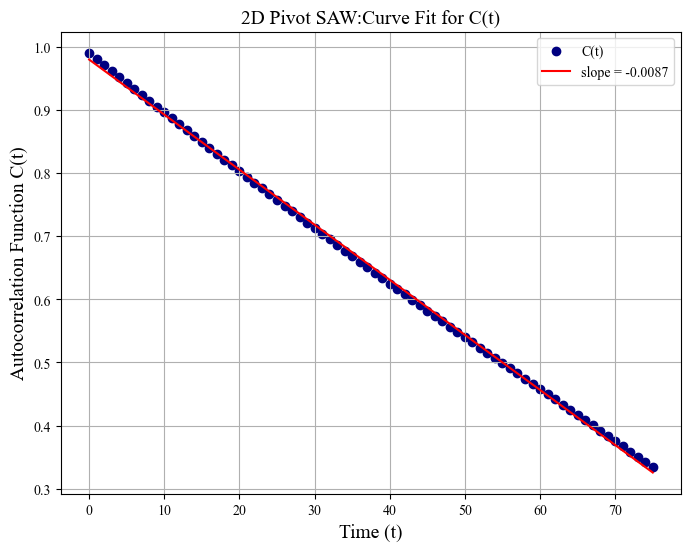

Durbin-Watson Statistic: 0.008591309671487206
Interpretation: Positive autocorrelation


In [539]:
C_t_values = calculate_C_t(walk_data, t_max)

#linear function to fit to C(t) value
def linear_model(t, a, b):
    return a * t + b

t_values = np.arange(len(C_t_values))
popt, _ = curve_fit(linear_model, t_values, C_t_values)

#fitted values from the linear fit 
fitted_values = linear_model(t_values, *popt)

#estimating the residuals 
residuals = C_t_values - fitted_values

#slope value to estimate the variation of C(t) with t
print(f"Slope (s): {popt[0]}")

#plotting the values 
plt.figure(figsize=(8, 6))
plt.scatter(t_values, C_t_values, marker='o', label='C(t)', color = 'navy')
plt.plot(t_values, fitted_values, label='slope = -0.0087', color='red')
plt.legend()
plt.title('2D Pivot SAW:Curve Fit for C(t)', fontsize =14)
plt.xlabel('Time (t)', fontsize = 14)
plt.ylabel('Autocorrelation Function C(t)', fontsize =14)
plt.grid(True)
plt.show()

#Durbin-Watson statistic for residuals using durbin_watson_test function
dw_statistic = np.sum(np.diff(residuals)**2) / np.sum(residuals**2)
interpretation = interpret_dw(dw_statistic)

# Interpretion of the Durbin-Watson statistic 
print(f"Durbin-Watson Statistic: {dw_statistic}")
print(f"Interpretation: {interpretation}")


# 2D SAW: Dimerization Algorithm

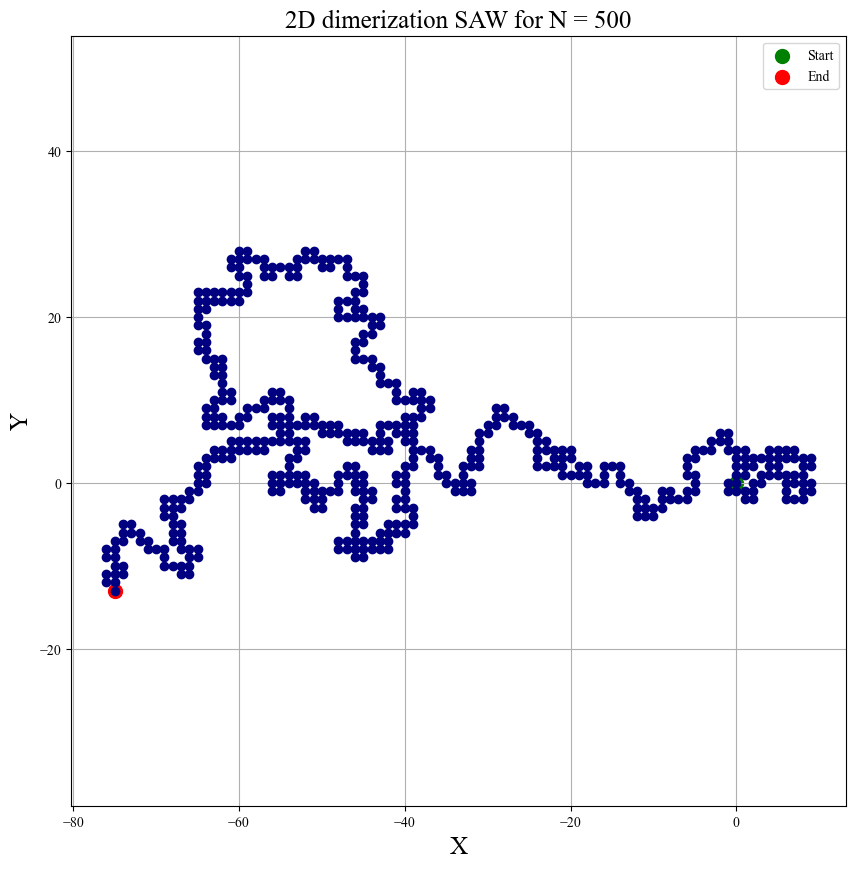

In [540]:
#function to define a SAW using dimerization algorithm

#check function if a generated sequence is self-avoiding 
def Check_SAW(x, y, N):
    return N + 1 == len(set(zip(x, y)))

# Function to create a small self-avoiding walk
def unit_SAW(N):
    # Define possible directions 
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    SAW_no = 1 #initializing variable to generate the walk 

    while SAW_no:
        x, y = [0],[0]
        coordinates = set([(0, 0)])
        stop = 0 #stop generating when it become self-avoiding 
        n = 0 #counter of number of steps taken in generating SAW

        # Generate a small SAW
        while n < N and not stop:
            dx, dy = directions[np.random.randint(0, 4)]
            if (x[-1] + dx, y[-1] + dy) in coordinates: #check if position revisited
                stop = 1 #stop generating
                break
            else:
                x.append(x[-1] + dx)
                y.append(y[-1] + dy)
                coordinates.add((x[-1] + dx, y[-1] + dy))
                n = n + 1

        if not stop:
            SAW_no = 0 #if the walk is self-avoiding, loop stops 

    return x, y

# Recursive function to creater a dimer by joining two smaller SAWs 
def Dimer_SAW(N):
    if N <= 3: #a small walk a generated for N<3 
        return unit_SAW(N)
    else:
        SAW_no = True
        while SAW_no:
            x_1, y_1 = Dimer_SAW(N // 2) #first half of the dimer 
            x_2, y_2 = Dimer_SAW(N - N // 2) #second half of the dimer walk 
            x_2 = [x + x_1[-1] for x in x_2] #shift second and connect to first
            y_2 = [y + y_1[-1] for y in y_2] 
            x_new, y_new = x_1 + x_2[1:], y_1 + y_2[1:] #combine the walks to a dimer
            if Check_SAW(x_new, y_new, N):
                SAW_no = False
        return x_new, y_new
    
#Function to plot a dimer for a given length
def plot_Dimer_SAW(N):
    x, y = Dimer_SAW(N)
    plt.figure(figsize=(10,10))
    plt.plot(x, y, color='navy', linestyle='-', marker='o')
    plt.scatter(x[0], y[0], color='green', s=100, label='Start')
    plt.scatter(x[-1], y[-1], color='red', label='End', s=100)
    plt.axis('equal')
    plt.legend()
    plt.title('2D dimerization SAW for N = 500', fontsize=18)
    plt.xlabel('X', fontsize = 18)
    plt.ylabel('Y', fontsize = 18)        
    plt.grid()
    plt.show()
    
plot_Dimer_SAW(500)

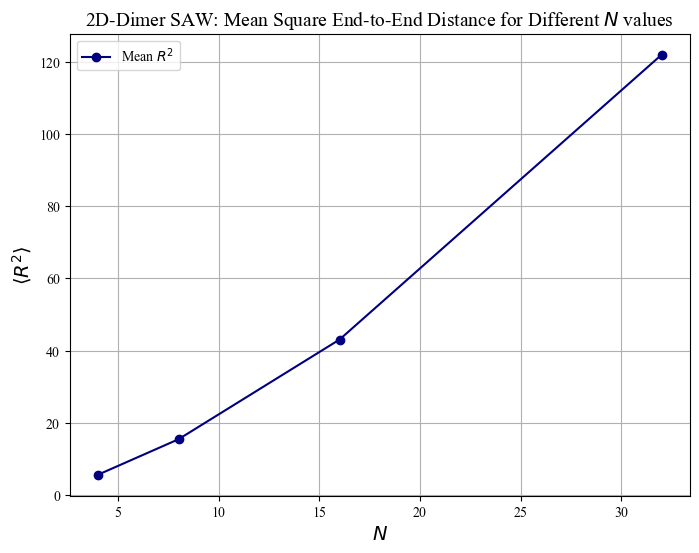

In [541]:
# Function to calculate mean R^2 end-to-end distance for a given N
def mean_square_end_to_end_distance(N, num_samples=10000):
    squared_distances = np.zeros(num_samples)

    for i in range(num_samples):
        (x, y) = Dimer_SAW(N) 
        squared_distance = (x[-1] - x[0])**2 + (y[-1] - y[0])**2
        squared_distances[i] = squared_distance

    # Calculate the mean square distance
    mean_square_distance = np.mean(squared_distances)

    return mean_square_distance

# Define N values
N_values = [4, 8, 16, 32]

# Calculate mean R^2 for different N values
mean_square_distances = [mean_square_end_to_end_distance(N) for N in N_values]

# Plotting mean R^2 against N
plt.figure(figsize=(8, 6))
plt.plot(N_values, mean_square_distances, color='navy', marker ='o', label=r'Mean $R^2$')
plt.xlabel('$N$', fontsize = 14)
plt.ylabel(r'$\langle R^2 \rangle$', fontsize = 14)
plt.title('2D-Dimer SAW: Mean Square End-to-End Distance for Different $N$ values', fontsize = 14)
plt.legend()
plt.grid()
plt.show()

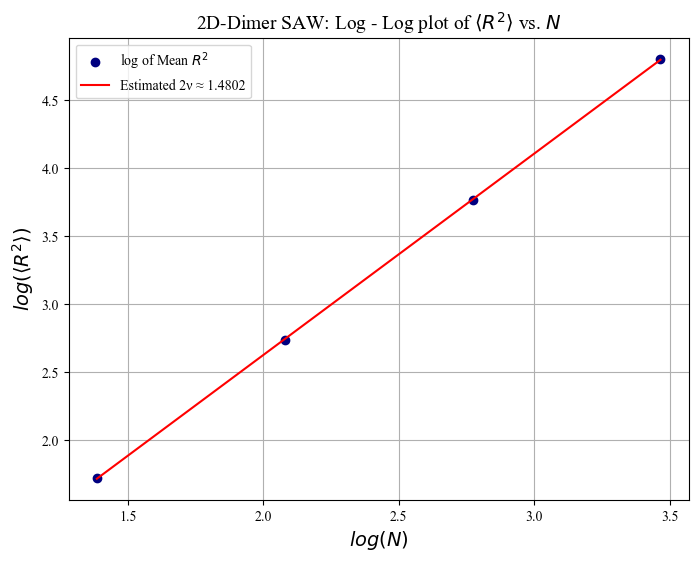

In [542]:
# Perform log-log regression to estimate the Flory parameter (exponent)
log_N = np.log(N_values)
log_R2 = np.log(mean_square_distances)
slope, intercept = np.polyfit(log_N, log_R2, 1)

# Generate line of best fit
line_of_best_fit = np.polyval([slope, intercept], log_N)

# Plotting log-log relationship
plt.figure(figsize=(8, 6))
plt.scatter(log_N, log_R2, color='navy',label=r'log of Mean $R^2$')
plt.plot(log_N, line_of_best_fit, color='red', label=f'Estimated 2ν ≈ {slope:.4f}')
plt.xlabel('$log(N)$', fontsize = 14)
plt.ylabel(r'$log(\langle R^2 \rangle)$', fontsize = 14)
plt.title(r'2D-Dimer SAW: Log - Log plot of $\langle R^2 \rangle$ vs. $N$', fontsize = 14)
plt.legend()
plt.grid()
plt.show()

## Histogram for log-log slope values over 100 executions

100%|██████████| 100/100 [00:00<00:00, 168.97it/s]


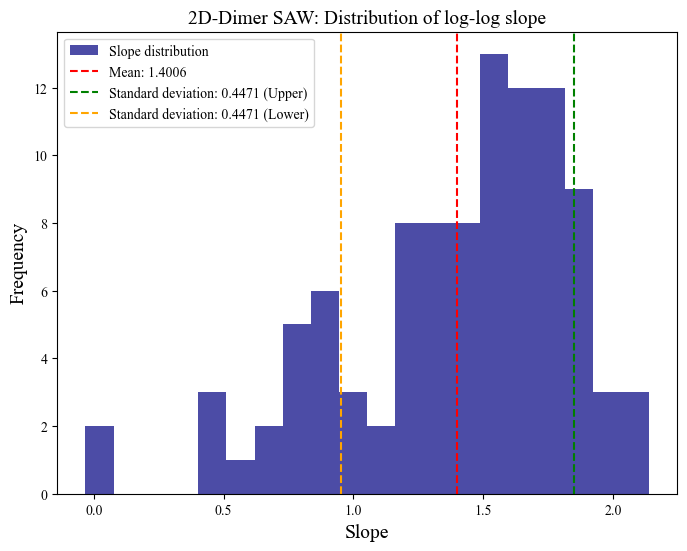

Mean slope: 1.4006
Standard Deviation of slope: 0.4471


In [543]:
# Function to calculate slope values for multiple executions
def calculate_slope(num_executions):
    slope_values = []

    N_values = [4, 8, 16, 32]  # Array of N values

    for _ in tqdm(range(num_executions)):
        R_squared_values = []  # List to store R^2 values for different N
        for N in N_values:  # Loop through specified N values
            x, y = Dimer_SAW(N) 
            squared_distance = (x[-1] - x[0])**2 + (y[-1] - y[0])**2
            R_squared_values.append(squared_distance)

        log_N = np.log(N_values)  # Log of N values
        log_R_squared = np.log(R_squared_values)  # Log of R^2 values

        # Estimate the exponent from the log-log plot
        slope, _ = np.polyfit(log_N, log_R_squared, 1)
        slope_values.append(slope)

    return slope_values

# Number of executions for pivot algorithm
num_executions = 100

# Calculate slope values for multiple executions
slope_values = calculate_slope(num_executions)

# Plotting the distribution of slope values
plt.figure(figsize=(8, 6))
plt.hist(slope_values, bins=20, color='navy', alpha=0.7, label="Slope distribution")
plt.xlabel('Slope', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('2D-Dimer SAW: Distribution of log-log slope', fontsize=14)

# Calculate mean and standard deviation of slope values
mean_slope = np.mean(slope_values)
std_slope = np.std(slope_values)

# Plot mean and standard deviation lines on the histogram
plt.axvline(x=mean_slope, color='red', linestyle='--', label=f"Mean: {mean_slope:.4f}")
plt.axvline(x=mean_slope + std_slope, color='green', linestyle='--', label=f"Standard deviation: {std_slope:.4f} (Upper)")
plt.axvline(x=mean_slope - std_slope, color='orange', linestyle='--', label=f"Standard deviation: {std_slope:.4f} (Lower)")

plt.legend()
plt.show()

# Print mean and standard deviation
print(f"Mean slope: {mean_slope:.4f}")
print(f"Standard Deviation of slope: {std_slope:.4f}")


### Autocorrelation function for Dimer SAW

In [544]:
# Function to calculate C(t)
def calculate_C_t(walk, t_max):
    R_squared = np.sum(walk**2, axis=1)
    R_squared_mean = np.mean(R_squared)
    R_fourth_mean = np.mean(R_squared**2)

    C_t = []
    for t in range(t_max):
        Rt_t_plus_t_prime = R_squared[:-t - 1]
        Rt_prime = R_squared[t + 1:]
        C_t_val = np.mean(Rt_t_plus_t_prime * Rt_prime) - R_squared_mean**2
        C_t_val /= (R_fourth_mean - R_squared_mean**2)
        C_t.append(C_t_val)
    
    return np.array(C_t)

# Function to interpret Durbin-Watson statistic
def interpret_dw(dw_statistic):
    if dw_statistic < 1.5: 
        return "Positive autocorrelation"
    elif dw_statistic > 2.5:
        return "Negative autocorrelation"
    else:
        return "No autocorrelation"

Slope (s): -0.009061706924618192


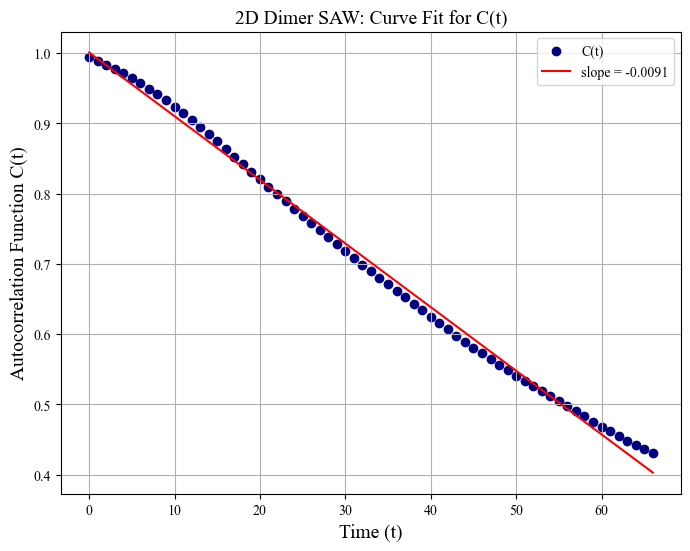

Durbin-Watson Statistic: 0.021124314143345934
Interpretation: Positive autocorrelation


In [556]:
N = 500  

# Generate a Dimer SAW of N steps
x, y = Dimer_SAW(N)

# Extract walk data for C(t) estimation
walk_data = np.array([x, y]).T

# Calculate C(t)
t_max = 67  # Maximum time lag for C(t)

C_t_values = calculate_C_t(walk_data, t_max)

# Function for linear model
def linear_model(t, a, b):
    return a * t + b

# Estimate parameters for the linear model
t_values = np.arange(len(C_t_values))
popt, _ = curve_fit(linear_model, t_values, C_t_values)

# Fitted values from the linear fit
fitted_values = linear_model(t_values, *popt)

# Estimating the residuals 
residuals = C_t_values - fitted_values

# Slope value to estimate the variation of C(t) with t
print(f"Slope (s): {popt[0]}")

# Plotting the values 
plt.figure(figsize=(8, 6))
plt.scatter(t_values, C_t_values, marker='o', label='C(t)', color='navy')
plt.plot(t_values, fitted_values, label=f'slope = {popt[0]:.4f}', color='red')
plt.legend()
plt.title('2D Dimer SAW: Curve Fit for C(t)', fontsize=14)
plt.xlabel('Time (t)', fontsize=14)
plt.ylabel('Autocorrelation Function C(t)', fontsize=14)
plt.grid(True)
plt.show()

# Durbin-Watson statistic for residuals
dw_statistic = np.sum(np.diff(residuals)**2) / np.sum(residuals**2)
interpretation = interpret_dw(dw_statistic)

# Interpretation of the Durbin-Watson statistic
print(f"Durbin-Watson Statistic: {dw_statistic}")
print(f"Interpretation: {interpretation}")

## Computational Time Comparison

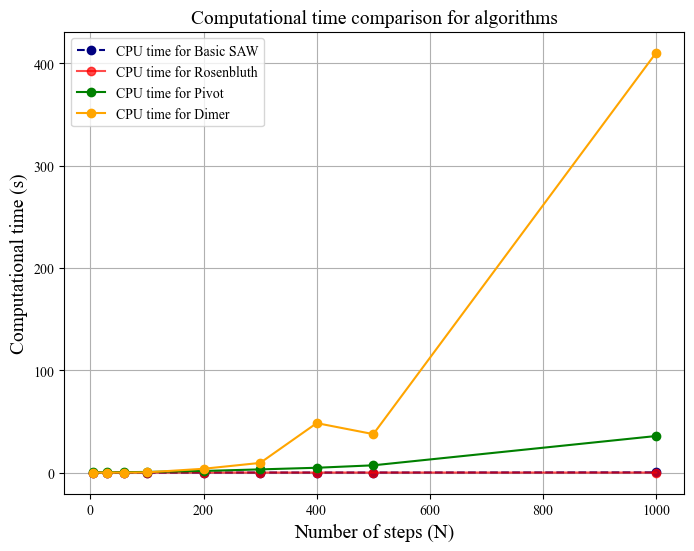

In [554]:
N = np.array([4,30,60,100,200,300,400,500,1000])
T_bSAW = np.array([0.001,0.0009,0.0011,0.0018,0.0063,0.0126,0.0242,0.0203,0.1748])
T_rosen = np.array([0.0020,0.0007,0.0000,0.0010,0.0025,0.0021,0.0010,0.0020,0.0010])
T_pivot = np.array([0.1946,0.2828,0.3681,0.6082,1.5641,3.0917,4.6838,7.0778,35.7326])
T_dimer = np.array([0,0.0022,0.0281,0.191,3.7021,9.4121,48.3271,37.5702,410.625])

plt.figure(figsize=(8,6))
plt.plot(N,T_bSAW,marker='o', linestyle ='--',color='navy', label = 'CPU time for Basic SAW')
plt.plot(N,T_rosen,marker='o',color='red', alpha =0.7, label = 'CPU time for Rosenbluth')
plt.plot(N,T_pivot,marker='o',color='green', label = 'CPU time for Pivot')
plt.plot(N,T_dimer,marker='o',color='orange', label = 'CPU time for Dimer')
plt.grid()
plt.legend()
plt.xlabel('Number of steps (N)', fontsize = 14)
plt.ylabel('Computational time (s)', fontsize = 14)
plt.title('Computational time comparison for algorithms', fontsize = 14)
plt.show()